### Inspect the correlation between dihedral angles of the matrix and distance travelled of the interstitial molecule

In [2]:
# import packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# %matplotlib widget
%matplotlib inline

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'FES.ipynb',
 'VMD-C17-C16-O15-C22-IBT10.agr',
 'VMD-C17-C16-O15-C22-IBT10.csv',
 'VMD-C17-C16-O15-C22-IBT19.agr',
 'VMD-C17-C16-O15-C22-IBT19.csv',
 'VMD-C66-O67-C68-C69-IBR48.agr',
 'VMD-C66-O67-C68-C69-IBR48.csv',
 'VMD-C66-O67-C68-C69-IBR57.agr',
 'VMD-C66-O67-C68-C69-IBR57.csv',
 'VMD-F8_FBZ9-O15_IBT10.agr',
 'VMD-F8_FBZ9-O15_IBT10.csv',
 'VMD-F8_FBZ9-O15_IBT19.agr',
 'VMD-F8_FBZ9-O15_IBT19.csv']

In [5]:
# get the dataframes regrarding the angles and the distance data
agnleDf    = pd.read_csv('VMD-C17-C16-O15-C22-IBT19.csv',delimiter=' ')
distanceDf = pd.read_csv('VMD-F8_FBZ9-O15_IBT19.csv',delimiter=' ')

In [6]:
# get rid of NaN
agnleDf    = agnleDf.dropna(axis=0)
distanceDf = distanceDf.dropna(axis=0)

In [7]:
# convert to numpy arrays
angle    = agnleDf['angle'].to_numpy()
time     = agnleDf['time'].to_list()
time     = [float(t)*0.001 for t in time] # convert time from picoseconds to nanoseconds
time     = np.asarray(time)
distance = distanceDf['distance'].to_numpy()

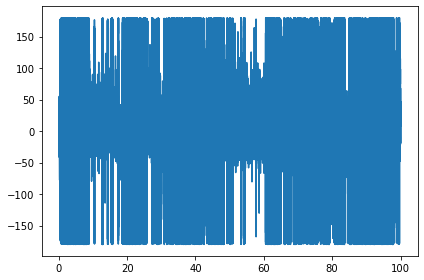

In [8]:
# inspection plot of the time series
fig   = plt.figure()
plt.plot(time, angle)
fig.tight_layout()
plt.show()

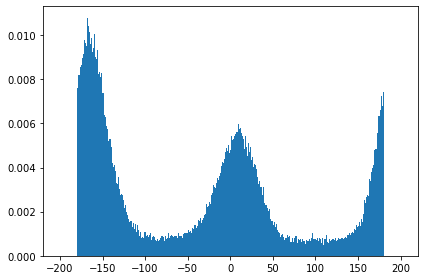

In [9]:
# inspect and histogram the angles probability distribution
fig   = plt.figure()
counts, bins, patches= plt.hist(angle, bins=500, range=(-200.0,+200.0), density=True)
fig.tight_layout()
plt.show()

In [10]:
# get data to lists

angle    = list(angle)
time     = list(time)
distance = list(distance)

# correspond the distance from the time-series to its probability
distanceProbability = []
for theta in angle:
    for bi in range(1,len(bins)):
        if theta <= bins[bi] and theta >= bins[bi-1]:
            distanceProbability.append(counts[bi])
            
distanceProbability = distanceProbability/max(distanceProbability)

In [11]:
# create dataframe with all data
d = {'angle': angle, 'time': time, 'distance': distance, 'distProb': distanceProbability*20}
df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='angle', ylabel='distance'>

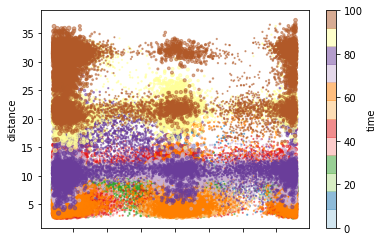

In [12]:
# color represents time
# size of markes represent the distance travelled probability
df.plot.scatter(x='angle',y='distance',c='time',colormap='Paired', s='distProb', alpha=0.5)

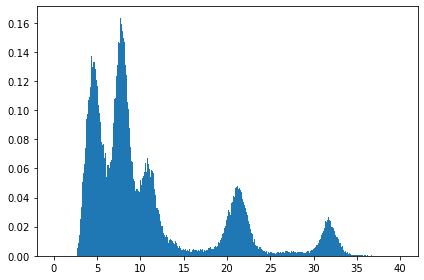

In [13]:
# inspect and histogram the distance probability
fig   = plt.figure()
counts, bins, patches= plt.hist(distance, bins=500, range=(0.0,+40.0), density=True)
fig.tight_layout()
plt.show()

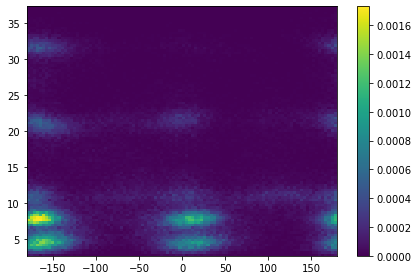

In [14]:
# 2D histogram the angle-distance distribution
fig   = plt.figure()
data  = plt.hist2d(angle,distance,bins =[100, 100],density=True)
plt.colorbar()
fig.tight_layout()
plt.show()

In [15]:
# prepare the data from the 2D histogram for 3D plotting
probability = data[0]
angle       = data[1]
distance    = data[2]

In [16]:
# the bins obtained by the plt.hist method are one element bigger than n
# this function return an array that holds the average bin so the size matches the size of n
def get_x(bins):
    tmpArray = np.zeros(len(bins)-1)
    for i in range(0,len(bins)-1):
        tmpArray[i] = 0.5*( bins[i] + bins[i+1] )
    return tmpArray

In [17]:
angle    = get_x(angle)
distance = get_x(distance)

In [18]:
# import package for 3D plotting
from mpl_toolkits.mplot3d import axes3d

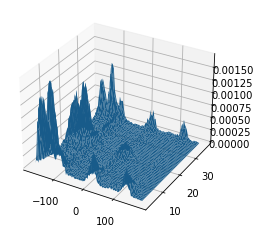

In [19]:
# inpect the combined distance-angle probability distribution in 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

Xgrid, Ygrid = np.meshgrid(angle, distance)

# Plot a 3D surface
ax.plot_surface(Xgrid, Ygrid, probability)

In [ ]:
# R = 8.3145*1.0e-3
# T = 350

In [ ]:
# H, xedges, yedges = np.histogram2d(angle, distance, bins=100, density=True)

In [ ]:
# Gibbs = -R*T*np.log(probability+1.0e-13)

In [ ]:
# fig = plt.figure()

# ax = fig.add_subplot(111, projection='3d')

# DG = Gibbs - np.min(Gibbs) 

# # Plot a 3D surface
# ax.plot_surface(Xgrid, Ygrid, DG)